After dimensionality reduction:
[[ 12.08273265]
 [ 17.00797824]
 [-14.7507627 ]
 [-14.33994819]]
con: 12.082732651067943
3%: 17.007978243387228
4%: -14.750762703790631
10%: -14.339948190664527

Variance Explained:
[0.86514899]


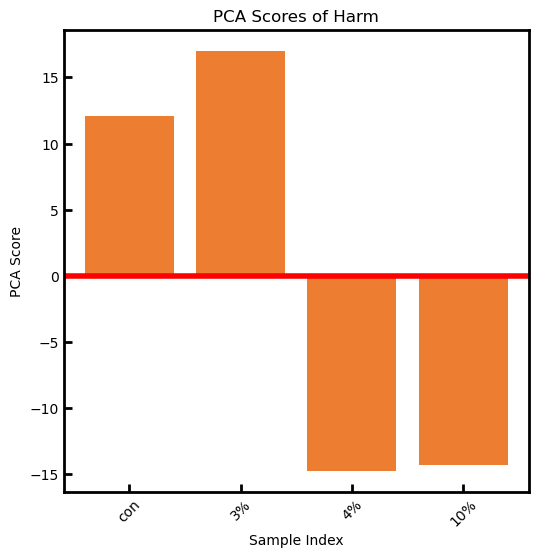

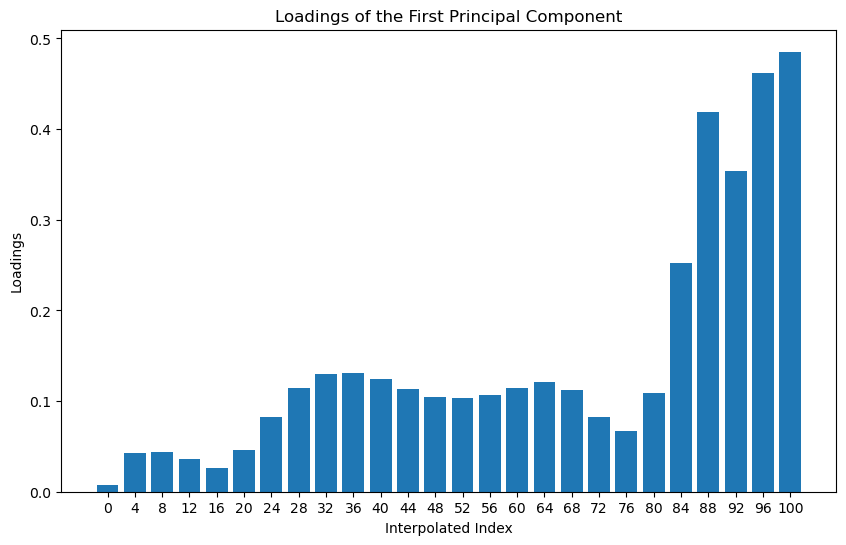

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

file_path = 'Harm_data.xlsx'
df_v_interp = pd.read_excel(file_path, sheet_name='Spline', keep_default_na=False)

X = df_v_interp.iloc[:, 1:]  
X.columns = X.columns.astype(str) 
X = X.T  

indices = np.arange(0, 101, 4)
X = X.iloc[:, indices]

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)


print("After dimensionality reduction:")
print(X_pca)
print(f"con: {X_pca[0][0]}")
print(f"3%: {X_pca[1][0]}")
print(f"4%: {X_pca[2][0]}")
print(f"10%: {X_pca[3][0]}")


print("\nVariance Explained:")
print(pca.explained_variance_ratio_)


plt.figure(figsize=(6, 6))
plt.bar(X.index, X_pca[:, 0], color=(237/255, 125/255, 49/255))
# plt.bar(X.index, X_pca[:, 0], color=(0.1, 0.2, 0.5))
plt.xlabel('Sample Index')
plt.ylabel('PCA Score')
plt.title('PCA Scores of Harm')
plt.xticks(rotation=45)

plt.axhline(0, color='red', linewidth=4)  

ax = plt.gca()  
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.tick_params(axis='both', direction='in', length=6, width=2)

plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.components_[0])), pca.components_[0], tick_label=indices.astype(str))
plt.xlabel('Interpolated Index')
plt.ylabel('Loadings')
plt.title('Loadings of the First Principal Component')
plt.show()
